In [83]:
import numpy as np
import matplotlib.pyplot as plt

In [84]:
#alpha scaling does not work. Basically works like a normal machine learning algorithm
"""
We want y as a function of x, i.e. f(x), but we found the relation
y as a function of f(bar{x}) instead. 
"""
advection = -10
alpha = 1/advection

xL = -100
xR = 121
yL = -35
yR = 235

scaling_alpha = 1/(xR-xL)
scaling_beta = (-xL)/(xR-xL)

In [85]:
i = 49 # number of colocation points
xi = np.linspace(xL, xR, i+2)
#x = np.linspace(xL,xR,i)

xi = xi[1:-1]

xi = scaling_alpha*xi + scaling_beta



In [86]:
"""
Initialization of matrix components, 
we are solving something of the form 
Ax = b, where A is our coefficient matrix,
x is the vector that we are solving for (the coefficients),
and y is the output vector
"""

#Write Code for n number of tanh functions, as well as J colocation points

n_tanh = 50
#This is the number of tanh functions we want in our system, the total size of the matrix will be this plus 1

A = np.zeros((i+2, n_tanh+1)) 
#The matrix A has i+2 rows for the 2 boundary values, and the i colocation points
#The matrix A has n+1 columns to fit the required amount of hyperbolic tangent functions, as well as the bias for the two boundary values

R_1_i = np.zeros(n_tanh)
R_2_i = np.zeros(n_tanh)
#These are matrices that store the random coefficients R_i that are put into the tanh function
#They have the same size as n_tanh because the random variable set for each column is the same

for j in range (n_tanh):
    #initialize random variable values
    R_1_i[j] = np.random.default_rng().uniform(-1,1)
    R_2_i[j] = np.random.default_rng().uniform(-1,1)

A[0, n_tanh] = 1
A[1, n_tanh] = 1


#Change the value for the boundary points to equal 1 because of the bias

#creates the first two rows through iteration
for j in range (i+2):
    for k in range(n_tanh):
        if(j == 0):
            A[j][k] = np.tanh(R_1_i[k]*(xL*scaling_alpha + scaling_beta) + R_2_i[k])
        elif(j == 1):
            A[j][k] = np.tanh(R_1_i[k]*(xR*scaling_alpha + scaling_beta) + R_2_i[k])
        else:
            A[j][k] = (R_1_i[k] + alpha*(R_1_i[k]**2)*2*np.tanh(R_1_i[k]*xi[j-2] + R_2_i[k]))/((np.cosh(R_1_i[k]*xi[j-2] + R_2_i[k]))**2)
print(np.linalg.cond(A))
b_vector = np.zeros(i+2)
b_vector[0] = yL
b_vector[1] = yR

#b_vector is our solution vector (i.e the y-values for the boundary values)

8.693674786817904e+18


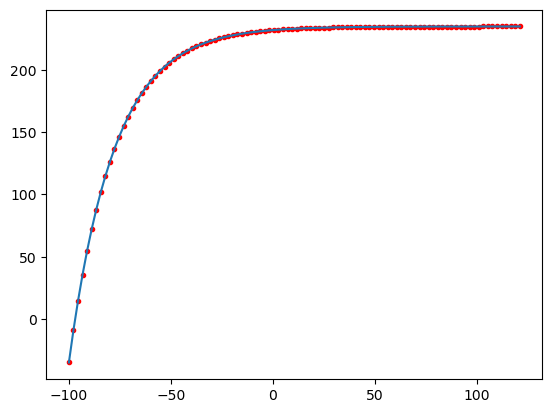

In [87]:
coeff = np.matmul(np.linalg.pinv(A), b_vector)

N = 100 # No of predictions
y_tanh = np.zeros(N)
x = np.linspace(xL, xR, N)
y_exact = yL + (yR-yL)*(np.exp((x-xL)/(alpha*(xR-xL))) - 1)/(np.exp(1/alpha) - 1 )
x_scaled = scaling_alpha*x + scaling_beta

for ith in range(N):
#     y_tanh[ith] = 0
    for j in range(n_tanh):
        y_tanh[ith] = y_tanh[ith] + coeff[j] * np.tanh(R_1_i[j]*x_scaled[ith]+R_2_i[j])
    y_tanh[ith] = y_tanh[ith] + coeff[n_tanh]

plt.plot(x, y_tanh, 'r.')
plt.plot(x, y_exact)

#only works for fixed yL at 0, fixed xL at 0, fixed xR at 1. Works for yR only.  

In [82]:
print(x_scaled)

[-5.55111512e-17  1.01010101e-02  2.02020202e-02  3.03030303e-02
  4.04040404e-02  5.05050505e-02  6.06060606e-02  7.07070707e-02
  8.08080808e-02  9.09090909e-02  1.01010101e-01  1.11111111e-01
  1.21212121e-01  1.31313131e-01  1.41414141e-01  1.51515152e-01
  1.61616162e-01  1.71717172e-01  1.81818182e-01  1.91919192e-01
  2.02020202e-01  2.12121212e-01  2.22222222e-01  2.32323232e-01
  2.42424242e-01  2.52525253e-01  2.62626263e-01  2.72727273e-01
  2.82828283e-01  2.92929293e-01  3.03030303e-01  3.13131313e-01
  3.23232323e-01  3.33333333e-01  3.43434343e-01  3.53535354e-01
  3.63636364e-01  3.73737374e-01  3.83838384e-01  3.93939394e-01
  4.04040404e-01  4.14141414e-01  4.24242424e-01  4.34343434e-01
  4.44444444e-01  4.54545455e-01  4.64646465e-01  4.74747475e-01
  4.84848485e-01  4.94949495e-01  5.05050505e-01  5.15151515e-01
  5.25252525e-01  5.35353535e-01  5.45454545e-01  5.55555556e-01
  5.65656566e-01  5.75757576e-01  5.85858586e-01  5.95959596e-01
  6.06060606e-01  6.16161

In [76]:
s = np.random.default_rng().uniform(-1,1)
print(s)

0.2300691740199854
